In [69]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)
from sklearn.datasets import make_blobs as blobs

import numpy as np

# User-defined classes
from utils.base import (
    # LinearRegression,
    LogisticRegression,
    Trainer
)

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [70]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 25
SIZE = 300
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [71]:
# Generating data that can be seperated with linear decision boundary
X, y = blobs(SIZE, n_features=2, centers=2, cluster_std=[2, 1.8])
print("Generated Blobs:", "-> Generated X:", X, "\n-> Generated y:", y, sep="\n")

Generated Blobs:
-> Generated X:
[[ -5.88840817   8.42899474]
 [ -8.13799989   5.21104413]
 [-11.47604596  -4.17455304]
 [-11.93428729  -2.71066471]
 [-12.43889476  -6.16674006]
 [ -6.53996794  -2.30794314]
 [ -7.86146251   8.95953502]
 [-12.04612586  -3.35074901]
 [ -8.40026234  -1.83765991]
 [ -5.81580912   8.45554414]
 [ -7.09575954  -3.90142476]
 [-10.57423321  -0.94483298]
 [-10.11938465   5.99245199]
 [ -5.25734575  -4.90040393]
 [ -6.94078296   7.63104191]
 [ -9.99016708   1.27610229]
 [ -7.90712938   8.29293237]
 [ -8.64042356  10.85624455]
 [-11.82680966  -1.37441126]
 [-10.42179548  10.07155952]
 [ -5.61326968  10.14725915]
 [ -8.70693791  12.50095547]
 [-10.29826136  -5.69993628]
 [ -8.05769571   7.81556447]
 [ -9.70525625  -2.21639018]
 [ -9.17461419   9.84902979]
 [ -8.29140248   0.514033  ]
 [ -7.28926739   5.72823479]
 [ -9.74691028  -3.50254837]
 [ -4.42767434   7.30058521]
 [-11.73429087   9.59852152]
 [ -6.10366097  -1.57933279]
 [ -7.43074735  -2.41420857]
 [ -5.8208

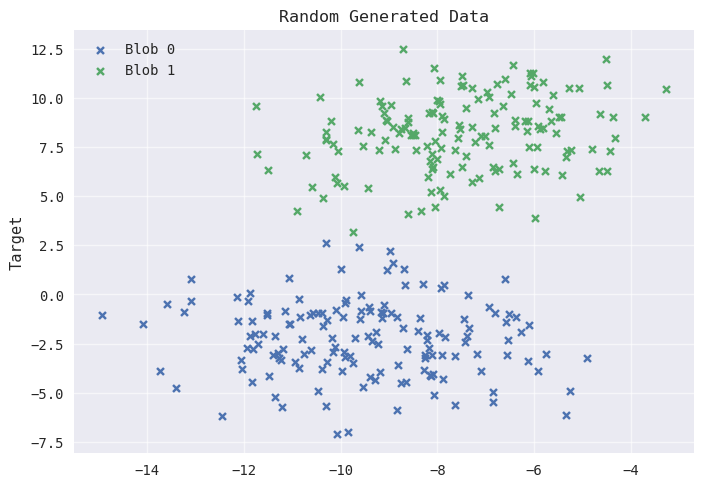

In [72]:
X0 = X[y == 0]
X1 = X[y == 1]

plt.scatter(X0[:, 0], X0[:, 1], marker='x', label="Blob 0", s=25);
plt.scatter(X1[:, 0], X1[:, 1], marker='x', label="Blob 1", s=25);

plt.grid(True, alpha = .6);
plt.title("Random Generated Data");
plt.ylabel("Target");
plt.legend(loc='best');
plt.show()

In [73]:
print("--> Feature 0 (X0)", X0, "\n--> Feature 1 (X1)", X1, sep='\n')

--> Feature 0 (X0)
[[-11.47604596  -4.17455304]
 [-11.93428729  -2.71066471]
 [-12.43889476  -6.16674006]
 [ -6.53996794  -2.30794314]
 [-12.04612586  -3.35074901]
 [ -8.40026234  -1.83765991]
 [ -7.09575954  -3.90142476]
 [-10.57423321  -0.94483298]
 [ -5.25734575  -4.90040393]
 [ -9.99016708   1.27610229]
 [-11.82680966  -1.37441126]
 [-10.29826136  -5.69993628]
 [ -9.70525625  -2.21639018]
 [ -8.29140248   0.514033  ]
 [ -9.74691028  -3.50254837]
 [ -6.10366097  -1.57933279]
 [ -7.43074735  -2.41420857]
 [-10.75606703  -3.03384769]
 [-10.86596667  -3.76704164]
 [-10.09889453  -0.78398044]
 [ -6.86120488  -4.97797628]
 [-11.2949332   -2.97095257]
 [-12.13907923  -0.13877811]
 [-10.94778348  -3.42441064]
 [-11.52641537  -1.06669748]
 [ -6.28231487  -1.88795263]
 [ -9.27004357  -1.90043152]
 [ -8.69872832   1.29938797]
 [ -9.90190313  -3.19905146]
 [-14.07925462  -1.52159597]
 [ -6.93063304  -0.62614099]
 [ -6.81045982  -0.94826039]
 [ -7.93185409   0.35429964]
 [-11.35408206  -2.13955

In [74]:
print(f"Shape of X0: {X0.shape}\nShape of X1: {X1.shape}")

Shape of X0: (150, 2)
Shape of X1: (150, 2)


In [75]:
# Frequency of labels
y = torch.tensor(y, dtype=DTYPE, device='cpu')
print(f"# of Targets (0 and 1):" , "-> 0: {}".format(y[y == 0].numel()), "-> 1: {}".format(y[y == 1].numel()), sep="\n")

# of Targets (0 and 1):
-> 0: 150
-> 1: 150


In [76]:
Model = LogisticRegression(in_dims=2)

In [77]:
# Numpy to Tensor
X0 = torch.tensor(X0)
X1 = torch.tensor(X1)